In [1]:
#Installtion
%pip install pandas 
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Imports
import pandas as pd
import numpy as np
from IPython.display import Image
import sqlite3
from datetime import datetime
import matplotlib.pyplot as plt

# Data Exploration and Profiling

In [3]:
#loading CSVs
df_betting_activity = pd.read_csv(r'Public\RawData\raw_betting_activity.csv')  
df_customers = pd.read_csv(r'Public\RawData\raw_customers.csv')  
df_leagues = pd.read_csv(r'Public\RawData\raw_leagues.csv') 
df_matches = pd.read_csv(r'Public\RawData\raw_matches.csv') 
df_sports = pd.read_csv(r'Public\RawData\raw_sports.csv') 

In [4]:
#  Missing Values check
print("\n Missing Values:")
for name, df in zip(
    ["Betting Activity", "Customers", "Leagues", "Matches", "Sports"],
    [df_betting_activity, df_customers, df_leagues, df_matches, df_sports]
):
    print(f"\n{name}:\n{df.isnull().sum()}")



 Missing Values:

Betting Activity:
transaction_id     0
timestamp          0
ip_address         0
user_agent         0
customer_id       15
bet_amount         0
currency           0
odds               0
bet_type           0
sport_code         0
league_code        0
match_id           0
selection          0
bet_status         0
device_type        0
payment_method    15
dtype: int64

Customers:
customer_id           0
registration_date     0
country               0
city                  0
age_group             0
gender                0
acquisition_source    0
vip_status            0
preferred_sport       0
preferred_payment     0
dtype: int64

Leagues:
league_code     0
league_name     0
sport_code      0
country         0
tier            0
season_start    0
season_end      0
dtype: int64

Matches:
match_id              0
start_time            0
home_team             0
away_team             0
league_code           0
sport_code            0
venue                 0
status                

In [5]:
#Duplications
print("\n Duplicate Primary Keys:")
print("Betting Activity (transaction_id):", df_betting_activity['transaction_id'].duplicated().sum())
print("Customers (customer_id):", df_customers['customer_id'].duplicated().sum())
print("Leagues (league_code):", df_leagues['league_code'].duplicated().sum())
print("Matches (match_id):", df_matches['match_id'].duplicated().sum())
print("Sports (sport_code):", df_sports['sport_code'].duplicated().sum())


 Duplicate Primary Keys:
Betting Activity (transaction_id): 0
Customers (customer_id): 0
Leagues (league_code): 0
Matches (match_id): 0
Sports (sport_code): 0


In [6]:
print("\n Foreign Key Mismatches:")

print("Betting Activity → Customers (customer_id):")
fk_customer = df_betting_activity['customer_id'].dropna().isin(df_customers['customer_id'])
print("  Missing:", (~fk_customer).sum())

print("Betting Activity → Matches (match_id):")
fk_match = df_betting_activity['match_id'].isin(df_matches['match_id'])
print("  Missing:", (~fk_match).sum())

print("Betting Activity → Leagues (league_code):")
fk_league = df_betting_activity['league_code'].isin(df_leagues['league_code'])
print("  Missing:", (~fk_league).sum())

print("Betting Activity → Sports (sport_code):")
fk_sport = df_betting_activity['sport_code'].isin(df_sports['sport_code'])
print("  Missing:", (~fk_sport).sum())

print("Matches → Leagues (league_code):")
fk_match_league = df_matches['league_code'].isin(df_leagues['league_code'])
print("  Missing:", (~fk_match_league).sum())

print("Matches → Sports (sport_code):")
fk_match_sport = df_matches['sport_code'].isin(df_sports['sport_code'])
print("  Missing:", (~fk_match_sport).sum())

print("Leagues → Sports (sport_code):")
fk_league_sport = df_leagues['sport_code'].isin(df_sports['sport_code'])
print("  Missing:", (~fk_league_sport).sum())



 Foreign Key Mismatches:
Betting Activity → Customers (customer_id):
  Missing: 0
Betting Activity → Matches (match_id):
  Missing: 0
Betting Activity → Leagues (league_code):
  Missing: 0
Betting Activity → Sports (sport_code):
  Missing: 0
Matches → Leagues (league_code):
  Missing: 0
Matches → Sports (sport_code):
  Missing: 0
Leagues → Sports (sport_code):
  Missing: 0


In [7]:

df_matches['status'] = df_matches['status'].str.strip().str.lower()

matches_with_null_score = df_matches[
    (df_matches['status'] == 'completed') & (df_matches['score'].isnull())
]
print("\n Completed Matches with NULL Score:")
print(matches_with_null_score[['match_id', 'start_time', 'status']])

df_matches['status'] = df_matches['status'].str.strip().str.lower()
cancelled_with_null_score = df_matches[
    (df_matches['status'] == 'cancelled') & (df_matches['score'].isnull())
]
print("\n Cancelled Matches with NULL Score:")
print(cancelled_with_null_score[['match_id', 'start_time', 'status']])



 Completed Matches with NULL Score:
Empty DataFrame
Columns: [match_id, start_time, status]
Index: []

 Cancelled Matches with NULL Score:
       match_id            start_time     status
5   M2023110106  2023-11-01T15:00:00Z  cancelled
15  M2023110206  2023-11-02T15:00:00Z  cancelled
25  M2023110306  2023-11-03T15:00:00Z  cancelled


In [8]:
print("\n Date Format Validation:")
try:
    df_matches['start_time'] = pd.to_datetime(df_matches['start_time'])
    df_betting_activity['timestamp'] = pd.to_datetime(df_betting_activity['timestamp'])
    print("Date parsing successful.")
except Exception as e:
    print("Date parsing error:", e)



 Date Format Validation:
Date parsing successful.


# Expected Deliverables

## Star Schema Design

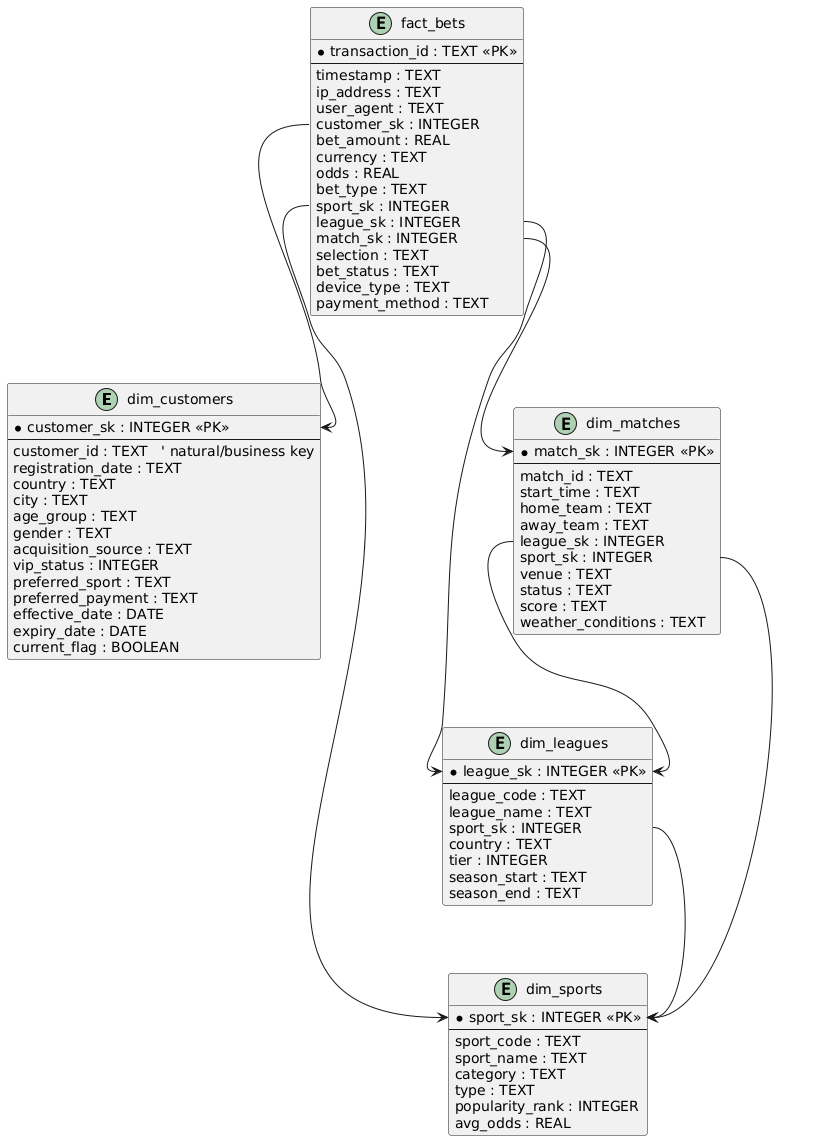

In [9]:
# Display a local PNG image
Image(filename='ER_diagram.png')



## Data Dictionary


### dim_customers
| Column           | Description                                              |
|------------------|----------------------------------------------------------|
| customer_sk      | Surrogate key (integer, primary key)                     |
| customer_id      | Original customer ID from source data (business key)     |
| registration_date| Date when customer registered                             |
| country          | Customer’s country                                        |
| city             | Customer’s city                                           |
| age_group        | Age group category                                       |
| gender           | Customer gender                                          |
| acquisition_source | How customer was acquired (marketing source)           |
| vip_status       | VIP status flag (e.g., 0 = no, 1 = yes)                 |
| preferred_sport  | Customer’s preferred sport                               |
| preferred_payment| Customer’s preferred payment method                      |
| effective_date   | Start date of this record version (for SCD Type 2)      |
| expiry_date      | End date of this record version (for SCD Type 2)        |
| current_flag     | Boolean flag indicating if this is the current record   |

---

### dim_sports
| Column           | Description                                              |
|------------------|----------------------------------------------------------|
| sport_sk         | Surrogate key (integer, primary key)                     |
| sport_code       | Sport code from source data                               |
| sport_name       | Name of the sport                                        |
| category         | Sport category (e.g., team, individual)                 |
| type             | Type of sport                                            |
| popularity_rank  | Ranking based on popularity                               |
| avg_odds         | Average betting odds for the sport                       |

---

### dim_leagues
| Column           | Description                                              |
|------------------|----------------------------------------------------------|
| league_sk        | Surrogate key (integer, primary key)                     |
| league_code      | League code from source data                              |
| league_name      | Name of the league                                       |
| sport_sk         | Foreign key to dim_sports.sport_sk                        |
| country          | Country where league is based                             |
| tier             | League tier level                                        |
| season_start     | Season start date                                        |
| season_end       | Season end date                                          |

---

### dim_matches
| Column           | Description                                              |
|------------------|----------------------------------------------------------|
| match_sk         | Surrogate key (integer, primary key)                     |
| match_id         | Match ID from source data                                |
| start_time       | Match start date and time                                |
| home_team        | Home team name                                          |
| away_team        | Away team name                                          |
| league_sk        | Foreign key to dim_leagues.league_sk                      |
| sport_sk         | Foreign key to dim_sports.sport_sk                        |
| venue            | Venue of the match                                      |
| status           | Match status (e.g., completed, cancelled)              |
| score            | Final match score (nullable for cancelled matches)     |
| weather_conditions| Weather conditions during the match                      |

---

## Fact Table

### fact_bets
| Column           | Description                                              |
|------------------|----------------------------------------------------------|
| transaction_id   | Unique ID for each bet (primary key)                     |
| timestamp       | Date and time when bet was placed                        |
| ip_address      | IP address of the user placing the bet                  |
| user_agent     | User agent string from device/browser                    |
| customer_sk    | Foreign key to dim_customers.customer_sk (nullable for anonymous users) |
| bet_amount     | Amount wagered                                          |
| currency       | Currency code of bet amount                              |
| odds           | Betting odds                                            |
| bet_type       | Type of bet placed                                      |
| sport_sk       | Foreign key to dim_sports.sport_sk                      |
| league_sk      | Foreign key to dim_leagues.league_sk                    |
| match_sk       | Foreign key to dim_matches.match_sk                     |
| selection      | The selection the bet was placed on                     |
| bet_status     | Status of the bet (e.g., won, lost, cancelled)          |
| device_type   | Device used to place the bet (e.g., mobile, desktop)     |
| payment_method| Payment method used for the bet                          |


## Transformation Logic

In [10]:


# Step 1: Create a new customer_id column in betting data:
# If customer_id is missing, replace it with the IP address (to identify anonymous users)
df_betting_activity['customer_id_filled'] = df_betting_activity['customer_id'].fillna(df_betting_activity['ip_address'])

# Step 2: Prepare anonymous customer records:
# Extract all unique anonymous customer IDs (which are IP addresses now)
anonymous_customer_ids = df_betting_activity.loc[df_betting_activity['customer_id'].isna(), 'customer_id_filled'].unique()

# Create a DataFrame for anonymous customers with default values for other fields
df_anonymous_customers = pd.DataFrame({
    'customer_id': anonymous_customer_ids,
    'registration_date': [pd.NaT]*len(anonymous_customer_ids),
    'country': [None]*len(anonymous_customer_ids),
    'city': [None]*len(anonymous_customer_ids),
    'age_group': [None]*len(anonymous_customer_ids),
    'gender': [None]*len(anonymous_customer_ids),
    'acquisition_source': ['anonymous']*len(anonymous_customer_ids),
    'vip_status': [0]*len(anonymous_customer_ids),
    'preferred_sport': [None]*len(anonymous_customer_ids),
    'preferred_payment': [None]*len(anonymous_customer_ids)
})

# Step 3: Combine original customers and anonymous customers into full customer dimension
df_customers_full = pd.concat([df_customers, df_anonymous_customers], ignore_index=True)

# Drop duplicates just in case
df_customers_full = df_customers_full.drop_duplicates(subset=['customer_id']).reset_index(drop=True)

# Step 4: Add SCD Type 2 fields (simple version)
today = datetime.today().date()
df_customers_full['effective_date'] = today
df_customers_full['expiry_date'] = pd.NaT
df_customers_full['current_flag'] = True

# Step 5: Add surrogate key for customers
df_customers_full['customer_sk'] = df_customers_full.index + 1

# Step 6: Prepare other dimension tables with surrogate keys

# Sports dimension
df_sports_clean = df_sports.drop_duplicates(subset=['sport_code']).copy()
df_sports_clean['sport_sk'] = range(1, len(df_sports_clean) + 1)

# Map sport_code to sport_sk for leagues
sport_sk_map = df_sports_clean.set_index('sport_code')['sport_sk'].to_dict()

# Leagues dimension
df_leagues_clean = df_leagues.drop_duplicates(subset=['league_code']).copy()
df_leagues_clean['sport_sk'] = df_leagues_clean['sport_code'].map(sport_sk_map)
df_leagues_clean['league_sk'] = df_leagues_clean.reset_index().index + 1

# Matches dimension
league_sk_map = df_leagues_clean.set_index('league_code')['league_sk'].to_dict()

df_matches_clean = df_matches.drop_duplicates(subset=['match_id']).copy()
df_matches_clean['league_sk'] = df_matches_clean['league_code'].map(league_sk_map)
df_matches_clean['sport_sk'] = df_matches_clean['sport_code'].map(sport_sk_map)
df_matches_clean['match_sk'] = df_matches_clean.reset_index().index + 1

# Step 7: Map surrogate keys into fact table

df_fact_bets = df_betting_activity.copy()

# Map customer_sk using 'customer_id_filled'
customer_sk_map = df_customers_full.set_index('customer_id')['customer_sk'].to_dict()
df_fact_bets['customer_sk'] = df_fact_bets['customer_id_filled'].map(customer_sk_map)

# Map sport_sk, league_sk, match_sk
df_fact_bets['sport_sk'] = df_fact_bets['sport_code'].map(sport_sk_map)
df_fact_bets['league_sk'] = df_fact_bets['league_code'].map(league_sk_map)
df_fact_bets['match_sk'] = df_fact_bets['match_id'].map(df_matches_clean.set_index('match_id')['match_sk'])

# Step 8: Keep original customer_id column in fact for traceability:
df_fact_bets['customer_id'] = df_fact_bets['customer_id_filled']

# Step 9: Optional cleanup: fill missing payment_method with 'Unknown'
df_fact_bets['payment_method'] = df_fact_bets['payment_method'].fillna('Unknown')

# Step 10: Load into SQLite

conn = sqlite3.connect('betting_dw.db')
cursor = conn.cursor()

# Create tables (if not exist)
cursor.execute('''
CREATE TABLE IF NOT EXISTS dim_customers (
    customer_sk INTEGER PRIMARY KEY,
    customer_id TEXT,
    registration_date TEXT,
    country TEXT,
    city TEXT,
    age_group TEXT,
    gender TEXT,
    acquisition_source TEXT,
    vip_status INTEGER,
    preferred_sport TEXT,
    preferred_payment TEXT,
    effective_date TEXT,
    expiry_date TEXT,
    current_flag BOOLEAN
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS dim_sports (
    sport_sk INTEGER PRIMARY KEY,
    sport_code TEXT,
    sport_name TEXT,
    category TEXT,
    type TEXT,
    popularity_rank INTEGER,
    avg_odds REAL
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS dim_leagues (
    league_sk INTEGER PRIMARY KEY,
    league_code TEXT,
    league_name TEXT,
    sport_sk INTEGER,
    country TEXT,
    tier INTEGER,
    season_start TEXT,
    season_end TEXT
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS dim_matches (
    match_sk INTEGER PRIMARY KEY,
    match_id TEXT,
    start_time TEXT,
    home_team TEXT,
    away_team TEXT,
    league_sk INTEGER,
    sport_sk INTEGER,
    venue TEXT,
    status TEXT,
    score TEXT,
    weather_conditions TEXT
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS fact_bets (
    transaction_id TEXT PRIMARY KEY,
    timestamp TEXT,
    ip_address TEXT,
    user_agent TEXT,
    customer_id TEXT,
    customer_sk INTEGER,
    bet_amount REAL,
    currency TEXT,
    odds REAL,
    bet_type TEXT,
    sport_sk INTEGER,
    league_sk INTEGER,
    match_sk INTEGER,
    selection TEXT,
    bet_status TEXT,
    device_type TEXT,
    payment_method TEXT
)
''')

conn.commit()

# Insert data into tables
df_customers_full.to_sql('dim_customers', conn, if_exists='replace', index=False)
df_sports_clean.to_sql('dim_sports', conn, if_exists='replace', index=False)
df_leagues_clean.to_sql('dim_leagues', conn, if_exists='replace', index=False)
df_matches_clean.to_sql('dim_matches', conn, if_exists='replace', index=False)
df_fact_bets.to_sql('fact_bets', conn, if_exists='replace', index=False)

conn.commit()
conn.close()

print("ETL completed successfully!")


ETL completed successfully!


## Data Quality Report



| Issue                         | Description                                         | Solution Implemented                               |
|-------------------------------|---------------------------------------------------|---------------------------------------------------|
| Missing Customer IDs           | Some betting records had missing `customer_id`.   | Replaced missing `customer_id` with corresponding `ip_address` to identify anonymous users. |
| Missing Payment Method         | Some bets had missing payment method information. | Filled missing payment methods with value `"Unknown"`. |
| Missing Match Scores           | A few matches had missing scores, often due to cancellations. | Kept scores as null or empty for cancelled matches; no imputation needed. |
| Duplicate Records              | Possible duplicate rows in raw datasets.           | Removed duplicates based on primary/business keys before loading into warehouse. |
| Slowly Changing Customer Data  | Customer attributes (e.g., VIP status, preferred payment) may change over time. | Implemented Type 2 Slowly Changing Dimension for `dim_customers` with `effective_date`, `expiry_date`, and `current_flag`. |



## Sample Queries

In [11]:
conn = sqlite3.connect('betting_dw.db')
cursor = conn.cursor()

# Query 1: Daily Betting Volume by Sport
query1 = """
SELECT 
    DATE(fb.timestamp) AS bet_date,
    ds.sport_name,
    COUNT(fb.transaction_id) AS total_bets,
    SUM(fb.bet_amount) AS total_bet_amount
FROM fact_bets fb
JOIN dim_sports ds ON fb.sport_sk = ds.sport_sk
GROUP BY bet_date, ds.sport_name
ORDER BY bet_date, ds.sport_name;
"""
cursor.execute(query1)
results1 = cursor.fetchall()

print("\nQuery 1: Daily Betting Volume by Sport")
print(f"{'Date':<12} {'Sport':<20} {'Total Bets':<12} {'Total Bet Amount':<16}")
print("-" * 60)
for row in results1:
    print(f"{row[0]:<12} {row[1]:<20} {row[2]:<12} {row[3]:<16.2f}")




Query 1: Daily Betting Volume by Sport
Date         Sport                Total Bets   Total Bet Amount
------------------------------------------------------------
2023-11-01   Basketball           2            125.00          
2023-11-01   Football             6            172.50          
2023-11-01   Hockey               1            30.00           
2023-11-01   Tennis               1            15.00           
2023-11-02   Basketball           2            135.00          
2023-11-02   Football             6            224.50          
2023-11-02   Hockey               1            35.00           
2023-11-02   Tennis               1            8.00            
2023-11-03   Basketball           2            109.00          
2023-11-03   Football             6            252.00          
2023-11-03   Hockey               1            45.00           
2023-11-03   Tennis               1            11.00           


In [12]:
query2 = """
SELECT 
    CASE 
        WHEN dc.customer_id LIKE '%.%' THEN 'Anonymous'
        ELSE 'Registered'
    END AS user_type,
    COUNT(fb.transaction_id) AS total_bets,
    SUM(fb.bet_amount) AS total_bet_amount
FROM fact_bets fb
LEFT JOIN dim_customers dc ON fb.customer_sk = dc.customer_sk
GROUP BY user_type;
"""
cursor.execute(query2)
results2 = cursor.fetchall()

print("\nQuery 2: Anonymous vs Registered User Betting Patterns")
print(f"{'User Type':<12} {'Total Bets':<12} {'Total Bet Amount':<16}")
print("-" * 45)
for row in results2:
    print(f"{row[0]:<12} {row[1]:<12} {row[2]:<16.2f}")


Query 2: Anonymous vs Registered User Betting Patterns
User Type    Total Bets   Total Bet Amount
---------------------------------------------
Anonymous    15           187.00          
Registered   15           975.00          


In [13]:
# Query 3: Top Matches by Betting Volume
query3 = """
SELECT 
    dm.match_id,
    dm.home_team || ' vs ' || dm.away_team AS match_name,
    dl.league_name,
    ds.sport_name,
    COUNT(fb.transaction_id) AS total_bets,
    SUM(fb.bet_amount) AS total_bet_amount
FROM fact_bets fb
JOIN dim_matches dm ON fb.match_sk = dm.match_sk
JOIN dim_leagues dl ON dm.league_sk = dl.league_sk
JOIN dim_sports ds ON fb.sport_sk = ds.sport_sk
GROUP BY dm.match_id
ORDER BY total_bet_amount DESC
LIMIT 10;
"""
cursor.execute(query3)
results3 = cursor.fetchall()

print("\nQuery 3: Top Matches by Betting Volume")
print(f"{'Match ID':<12} {'Match':<30} {'League':<20} {'Sport':<15} {'Total Bets':<12} {'Total Bet Amount':<16}")
print("-" * 110)
for row in results3:
    print(f"{row[0]:<12} {row[1]:<30} {row[2]:<20} {row[3]:<15} {row[4]:<12} {row[5]:<16.2f}")



Query 3: Top Matches by Betting Volume
Match ID     Match                          League               Sport           Total Bets   Total Bet Amount
--------------------------------------------------------------------------------------------------------------
M2023110209  Golden State Warriors vs Dallas Mavericks National Basketball Association Basketball      1            120.00          
M2023110105  Barcelona vs Real Madrid       La Liga              Football        1            100.00          
M2023110309  CSKA Moscow vs Olympiacos      EuroLeague Basketball Basketball      1            95.00           
M2023110205  Atletico Madrid vs Sevilla     La Liga              Football        1            90.00           
M2023110305  Valencia vs Villarreal         La Liga              Football        1            85.00           
M2023110109  Miami Heat vs Brooklyn Nets    National Basketball Association Basketball      1            75.00           
M2023110303  Wolves vs Brentford      

In [14]:
# Query 4: Customer Segmentation by Betting Behavior (summary info)
query4 = """
SELECT 
    dc.customer_id,
    COUNT(fb.transaction_id) AS num_bets,
    SUM(fb.bet_amount) AS total_bet_amount,
    AVG(fb.bet_amount) AS avg_bet_amount,
    COUNT(DISTINCT DATE(fb.timestamp)) AS active_days
FROM fact_bets fb
JOIN dim_customers dc ON fb.customer_sk = dc.customer_sk
WHERE dc.customer_id NOT LIKE '%.%'
GROUP BY dc.customer_id
LIMIT 10;
"""
cursor.execute(query4)
results4 = cursor.fetchall()

print("\nQuery 4: Customer Segmentation Sample (Top 10 Customers)")
print(f"{'Customer ID':<15} {'Num Bets':<10} {'Total Bet':<12} {'Avg Bet':<10} {'Active Days':<12}")
print("-" * 60)
for row in results4:
    print(f"{row[0]:<15} {row[1]:<10} {row[2]:<12.2f} {row[3]:<10.2f} {row[4]:<12}")




Query 4: Customer Segmentation Sample (Top 10 Customers)
Customer ID     Num Bets   Total Bet    Avg Bet    Active Days 
------------------------------------------------------------
C1234           1          60.00        60.00      1           
C2109           1          70.00        70.00      1           
C2345           1          100.00       100.00     1           
C3210           1          85.00        85.00      1           
C3456           1          75.00        75.00      1           
C4321           1          35.00        35.00      1           
C4567           1          45.00        45.00      1           
C5432           1          25.00        25.00      1           
C5678           1          120.00       120.00     1           
C6789           1          90.00        90.00      1           


In [15]:
# Query 5: Temporal Hourly Trends
query5 = """
SELECT 
    STRFTIME('%H', timestamp) AS hour,
    COUNT(*) AS total_bets,
    SUM(bet_amount) AS total_bet_amount
FROM fact_bets
GROUP BY hour
ORDER BY hour;
"""
cursor.execute(query5)
results5 = cursor.fetchall()

print("\nQuery 5: Temporal Hourly Trends")
print(f"{'Hour':<5} {'Total Bets':<12} {'Total Bet Amount':<16}")
print("-" * 40)
for row in results5:
    print(f"{row[0]:<5} {row[1]:<12} {row[2]:<16.2f}")

conn.close()


Query 5: Temporal Hourly Trends
Hour  Total Bets   Total Bet Amount
----------------------------------------
08    3            120.00          
09    3            29.00           
10    3            180.00          
11    3            44.00           
12    3            275.00          
13    3            19.00           
14    3            110.00          
15    3            60.00           
16    3            290.00          
17    3            35.00           
